## Overview

In this project, I am applying your frequentist inference and regression modeling skills on different datasets. 

## Global imports

Write your imports here so you don't have to write imports below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

## Problem 1

**Dataset:** `as_datasets/eyecolorgenderdata.csv`

**Dataset description:** A dataset containing information from college students: the gender, age, year in college, eye color, height in inches, how many miles driven per week, number of brothers, number of sisters, average hours of computer time per week, whether regular exercise is performed, how many hours on average of exercise is performed per week, how many music CDs owned, how many hours of gaming per week, and how many hours of tv per week.

**Write and discuss the steps to answering the following research question:** Subsample the full dataset by the last two digits of your CIN floor divided by 4. Does a male college student have an even chance of having blue, brown, green, or hazel eyes?

In [2]:
data = pd.read_csv('eyecolorgenderdata.csv')
data.head()

,gender,age,year,eyecolor,height,miles,brothers,sisters,computertime,exercise,exercisehours,musiccds,playgames,watchtv
0,female,18,first,hazel,68.0,195.0,0,1,20.0,Yes,3.0,75.0,6.0,18.0
1,male,20,third,brown,70.0,120.0,3,0,24.0,No,0.0,50.0,0.0,3.0
2,female,18,first,green,67.0,200.0,0,1,35.0,Yes,3.0,53.0,8.0,1.0
3,male,23,fourth,hazel,74.0,140.0,1,1,5.0,Yes,25.0,50.0,0.0,7.0
4,female,19,second,blue,62.0,60.0,0,1,5.0,Yes,4.0,30.0,2.0,5.0


In [3]:
def cin_subsample(df, cin):
    selecton_vector = np.arange(0, len(df), (cin % 100) // 4)
    return df.iloc[selecton_vector]

In [4]:
subsample_data = cin_subsample(data, 23)
subsample_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 2065
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         414 non-null    object 
 1   age            414 non-null    int64  
 2   year           414 non-null    object 
 3   eyecolor       414 non-null    object 
 4   height         410 non-null    float64
 5   miles          411 non-null    float64
 6   brothers       414 non-null    int64  
 7   sisters        414 non-null    int64  
 8   computertime   410 non-null    float64
 9   exercise       414 non-null    object 
 10  exercisehours  414 non-null    float64
 11  musiccds       407 non-null    float64
 12  playgames      414 non-null    float64
 13  watchtv        414 non-null    float64
dtypes: float64(7), int64(3), object(4)
memory usage: 48.5+ KB


<AxesSubplot:>

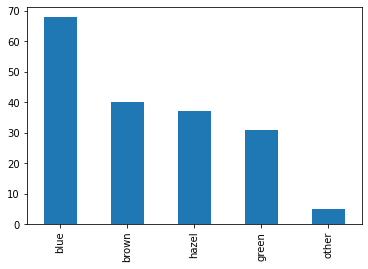

In [5]:
male = subsample_data[subsample_data['gender'] == 'male']
male['eyecolor'].value_counts().plot(kind='bar')

### Answer: The count of blue is greater relative to others. So, atleast in this subsample there is no equal chances of male student have an even chance of having blue, brown, green, or hazel eyes.

## Problem 2

**Dataset:** `as_datasets/eyecolorgenderdata.csv`

**Dataset description:** A dataset containing information from college students: the gender, age, year in college, eye color, height in inches, how many miles driven per week, number of brothers, number of sisters, average hours of computer time per week, whether regular exercise is performed, how many hours on average of exercise is performed per week, how many music CDs owned, how many hours of gaming per week, and how many hours of tv per week.

**Write and discuss the steps to answering the following research question:** Subsample the full dataset by the last two digits of your CIN floor divided by 4. Are students who drive more miles per week more likely to exercise less hours per week?

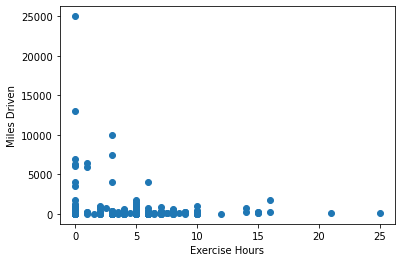

In [6]:
subsample_data = cin_subsample(data, 23)
plt.scatter(subsample_data['exercisehours'], subsample_data['miles'])
plt.xlabel('Exercise Hours')
plt.ylabel('Miles Driven')
plt.show()

### Answer: As shown in above graph, The mostly people who drives more miles per day have mainly have excercise hours range between 0 to 5. And those people have who more excercise hours have less miles driven. 

## Problem 3

**Dataset:** `as_datasets/eyecolorgenderdata.csv`

**Dataset description:** A dataset containing information from college students: the gender, age, year in college, eye color, height in inches, how many miles driven per week, number of brothers, number of sisters, average hours of computer time per week, whether regular exercise is performed, how many hours on average of exercise is performed per week, how many music CDs owned, how many hours of gaming per week, and how many hours of tv per week.

**Write and discuss the steps to answering the following research question:** Subsample the full dataset by the last two digits of your CIN floor divided by 4. Which attributes in your subsampled dataset work best to estimate the number of hours on average of exercise per week? Are the attributes that work plausible to be able to estimate the number of hours of exercise per week?

<AxesSubplot:>

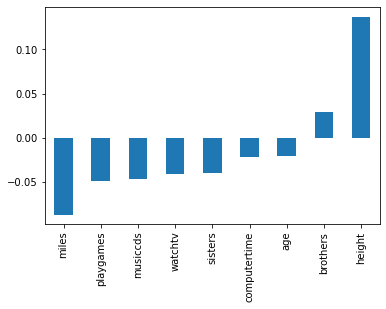

In [7]:
subsample_data = cin_subsample(data, 23)
subsample_data.corr()['exercisehours'].sort_values()[:-1].plot.bar()

<AxesSubplot:>

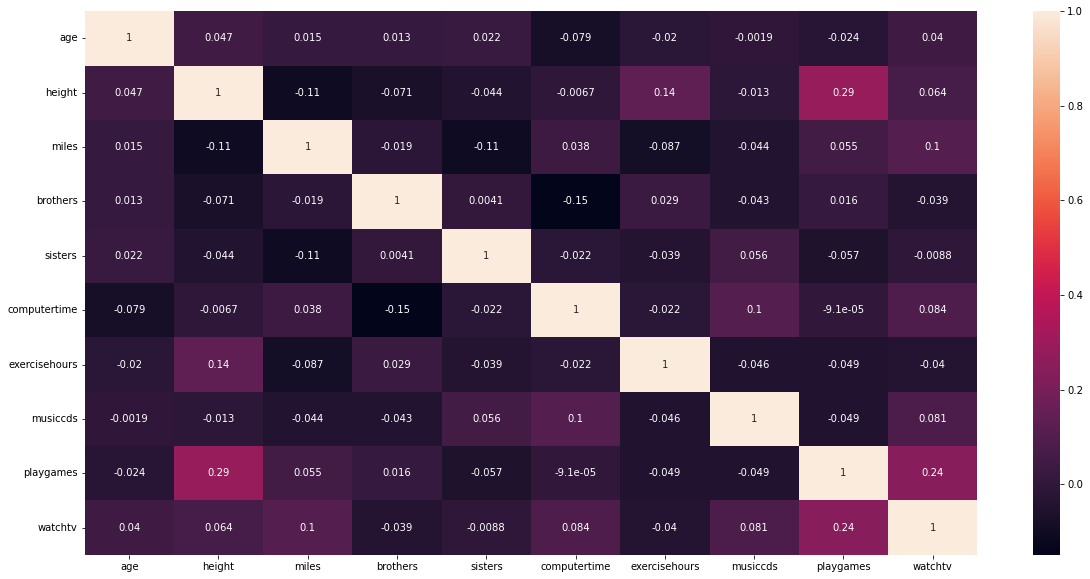

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(subsample_data.corr(), annot=True)

### Answer: As we can see from both above correlation plot and heatmap, in this data sample the other features are not much correlated to excercise hours. But height attribute have little bit more correlation then other attributes. Also miles have little negative correlation then other attributes.

## Problem 4

**Dataset:** `as_datasets/eyecolorgenderdata.csv`

**Dataset description:** A dataset containing information from college students: the gender, age, year in college, eye color, height in inches, how many miles driven per week, number of brothers, number of sisters, average hours of computer time per week, whether regular exercise is performed, how many hours on average of exercise is performed per week, how many music CDs owned, how many hours of gaming per week, and how many hours of tv per week.

**Write and discuss the steps to answering the following research problem:** Using the full dataset, build a regression model that is able to estimate the number of exercise hours of a college student.  Which features work best? Which machine learning algorithm produces the most accurate results without overfitting? Justify the machine learning algorithm you chose.

In [9]:
subsample_data

,gender,age,year,eyecolor,height,miles,brothers,sisters,computertime,exercise,exercisehours,musiccds,playgames,watchtv
0,female,18,first,hazel,68.0,195.0,0,1,20.0,Yes,3.0,75.0,6.0,18.0
5,male,19,second,green,67.0,0.0,0,1,5.0,Yes,8.0,100.0,0.0,10.0
10,male,25,fourth,blue,69.0,90.0,0,3,3.0,Yes,6.0,55.0,0.0,21.0
15,male,22,other,blue,73.0,90.0,0,1,15.0,Yes,10.0,35.0,20.0,4.0
20,male,20,third,hazel,70.0,184.0,2,0,20.0,No,0.0,40.0,10.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,female,22,fourth,brown,65.0,231.0,0,4,30.0,Yes,6.0,200.0,0.0,5.0
2050,female,19,second,brown,62.0,110.0,0,1,5.0,No,0.0,30.0,1.0,10.0
2055,male,20,second,brown,72.0,140.0,0,1,21.0,No,0.0,150.0,7.0,21.0
2060,female,20,second,blue,69.0,360.0,1,1,20.0,Yes,0.0,25.0,0.0,5.0


In [10]:
# Copying subsample data to test
test = subsample_data.copy()

In [11]:
# Converting Categorical columns values to numeric
test['gender'] = test['gender'].astype('category').cat.codes
test['year'] = test['year'].astype('category').cat.codes
test['eyecolor'] = test['eyecolor'].astype('category').cat.codes
test['exercise'] = test['exercise'].astype('category').cat.codes

In [12]:
#Checking null values in features before passing them to model
test[test.isna().any(axis=1)]

,gender,age,year,eyecolor,height,miles,brothers,sisters,computertime,exercise,exercisehours,musiccds,playgames,watchtv
1155,0,20,3,2,70.0,200.0,1,0,NaN,1,9.0,20.0,1.0,14.0
1160,0,22,1,0,NaN,190.0,1,0,20.0,0,0.0,20.0,0.0,10.0
1215,0,20,3,1,70.0,140.0,0,1,NaN,0,0.0,100.0,2.5,10.0
1255,0,19,3,1,68.0,NaN,0,2,10.0,0,0.0,30.0,10.0,10.0
1320,1,27,4,1,68.0,6500.0,0,1,1.0,1,1.0,NaN,0.5,0.5
1340,1,22,4,0,71.0,130.0,2,2,NaN,1,6.5,30.0,1.5,6.0
1425,0,20,4,1,67.0,368.0,2,1,20.0,1,6.0,NaN,4.0,4.0
1435,1,21,1,0,75.0,50.0,0,1,NaN,1,3.0,10.0,1.0,20.0
1460,0,21,4,1,64.0,NaN,1,2,7.0,0,0.0,NaN,0.0,6.5
1510,1,21,4,3,72.0,175.0,1,2,10.0,0,0.0,NaN,30.0,20.0


In [13]:
#Filling null values
test['miles'].fillna(test['miles'].interpolate(method='nearest'), inplace=True)
test['height'].fillna(test['height'].interpolate(method='nearest'), inplace=True)
test['computertime'].fillna(test['computertime'].interpolate(method='nearest'), inplace=True)
test['musiccds'].fillna(test['musiccds'].interpolate(method='nearest'), inplace=True)

In [14]:
#Again checking for missing values
test.isna().sum()

gender           0
age              0
year             0
eyecolor         0
height           0
miles            0
brothers         0
sisters          0
computertime     0
exercise         0
exercisehours    0
musiccds         0
playgames        0
watchtv          0
dtype: int64

In [15]:
# Preparing for train and test
X = test.drop(['exercisehours'], axis=1)
y = test[['exercisehours']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
# Apply regression model to our data
models = [LinearRegression, ElasticNet, Lasso, DecisionTreeRegressor, RandomForestRegressor]
for model in models:
    reg = model()
    reg.fit(X_train,y_train)
    pred = reg.predict(X_test)
    err = mean_squared_error(y_test, pred) ** .5
    print(f'RMSE of {model.__name__} model is: {err}')
    print(f'R2 value of {model.__name__} is: {np.mean(r2_score(y_test, pred))}')
    print('*'*50)

RMSE of LinearRegression model is: 2.852603084839108
R2 value of LinearRegression is: 0.46404135370472277
**************************************************
RMSE of ElasticNet model is: 3.504985029933499
R2 value of ElasticNet is: 0.19086512328319172
**************************************************
RMSE of Lasso model is: 3.462518374687049
R2 value of Lasso is: 0.21035341772329463
**************************************************
RMSE of DecisionTreeRegressor model is: 4.888148933901257
R2 value of DecisionTreeRegressor is: -0.5737561701463973
**************************************************


C:\Users\hassa\AppData\Local\Temp/ipykernel_492/2063490830.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train,y_train)


RMSE of RandomForestRegressor model is: 3.0767670045032656
R2 value of RandomForestRegressor is: 0.3764980651769796
**************************************************


#### Answer
### Linear regession is the best model among the first three linear models. Tree models resulted much better then rest of other linear models. Regarding which features work best we can't say one or two features which perfectly play important role for our models but height and miles do this job realtively better than others features.

## Problem 5

**Dataset:** `ml_datasets/building_energy_efficiency.csv` (Dataset creators: Angeliki Xifara and Athanasios Tsanas)

**Dataset description:** A dataset containing energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses.

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2):

- X1 Relative Compactness
- X2 Surface Area
- X3 Wall Area
- X4 Roof Area
- X5 Overall Height
- X6 Orientation
- X7 Glazing Area
- X8 Glazing Area Distribution
- y1 Heating Load
- y2 Cooling Load

**Write and discuss the steps to answering the following research problem:** Build a regression model to predict the heating load. Which features work best? Which machine learning algorithm produces the most accurate results without overfitting? Justify the machine learning algorithm you chose.

In [17]:
# Reading Dataset
data_bef = pd.read_csv('building_energy_efficiency.csv')
data_bef.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28,NaN,NaN


In [18]:
data_bef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    float64
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    float64
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
 10  Unnamed: 10                0 non-null      float64
 11  Unnamed: 11                0 non-null      float64
dtypes: float64(12)
memory usage: 121.6 KB


### we can see above we have two completely null columns in dataset so we are gonna drop it 

In [19]:
# Remove columns with full of null values
data_bef.drop(['Unnamed: 10','Unnamed: 11'], axis = 1, inplace=True)


In [20]:
# Remove rows with full of null values
data_bef.dropna(inplace=True)

In [21]:
# Rename the column names
data_bef.rename(columns={"Relative Compactness": "Relative_Compactness", "Surface Area": "Surface_Area",
                   "Wall Area":"Wall_Area", "Roof Area":"Roof_Area","Overall Height":"Overall_Height",
                    "Glazing Area":"Glazing_Area", "Glazing Area Distribution":"Glazing_Area_Distribution",
                   "Heating Load":"Heating_Load", "Cooling Load":"Cooling_Load"}, inplace=True)

### There is no null value. Moreover all the values are integer or float. So the data is clean and ready to be explored and feeded to a model.

In [22]:
data_bef.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative_Compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
Surface_Area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
Wall_Area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
Roof_Area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
Overall_Height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
Orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
Glazing_Area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
Glazing_Area_Distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Heating_Load,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Cooling_Load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


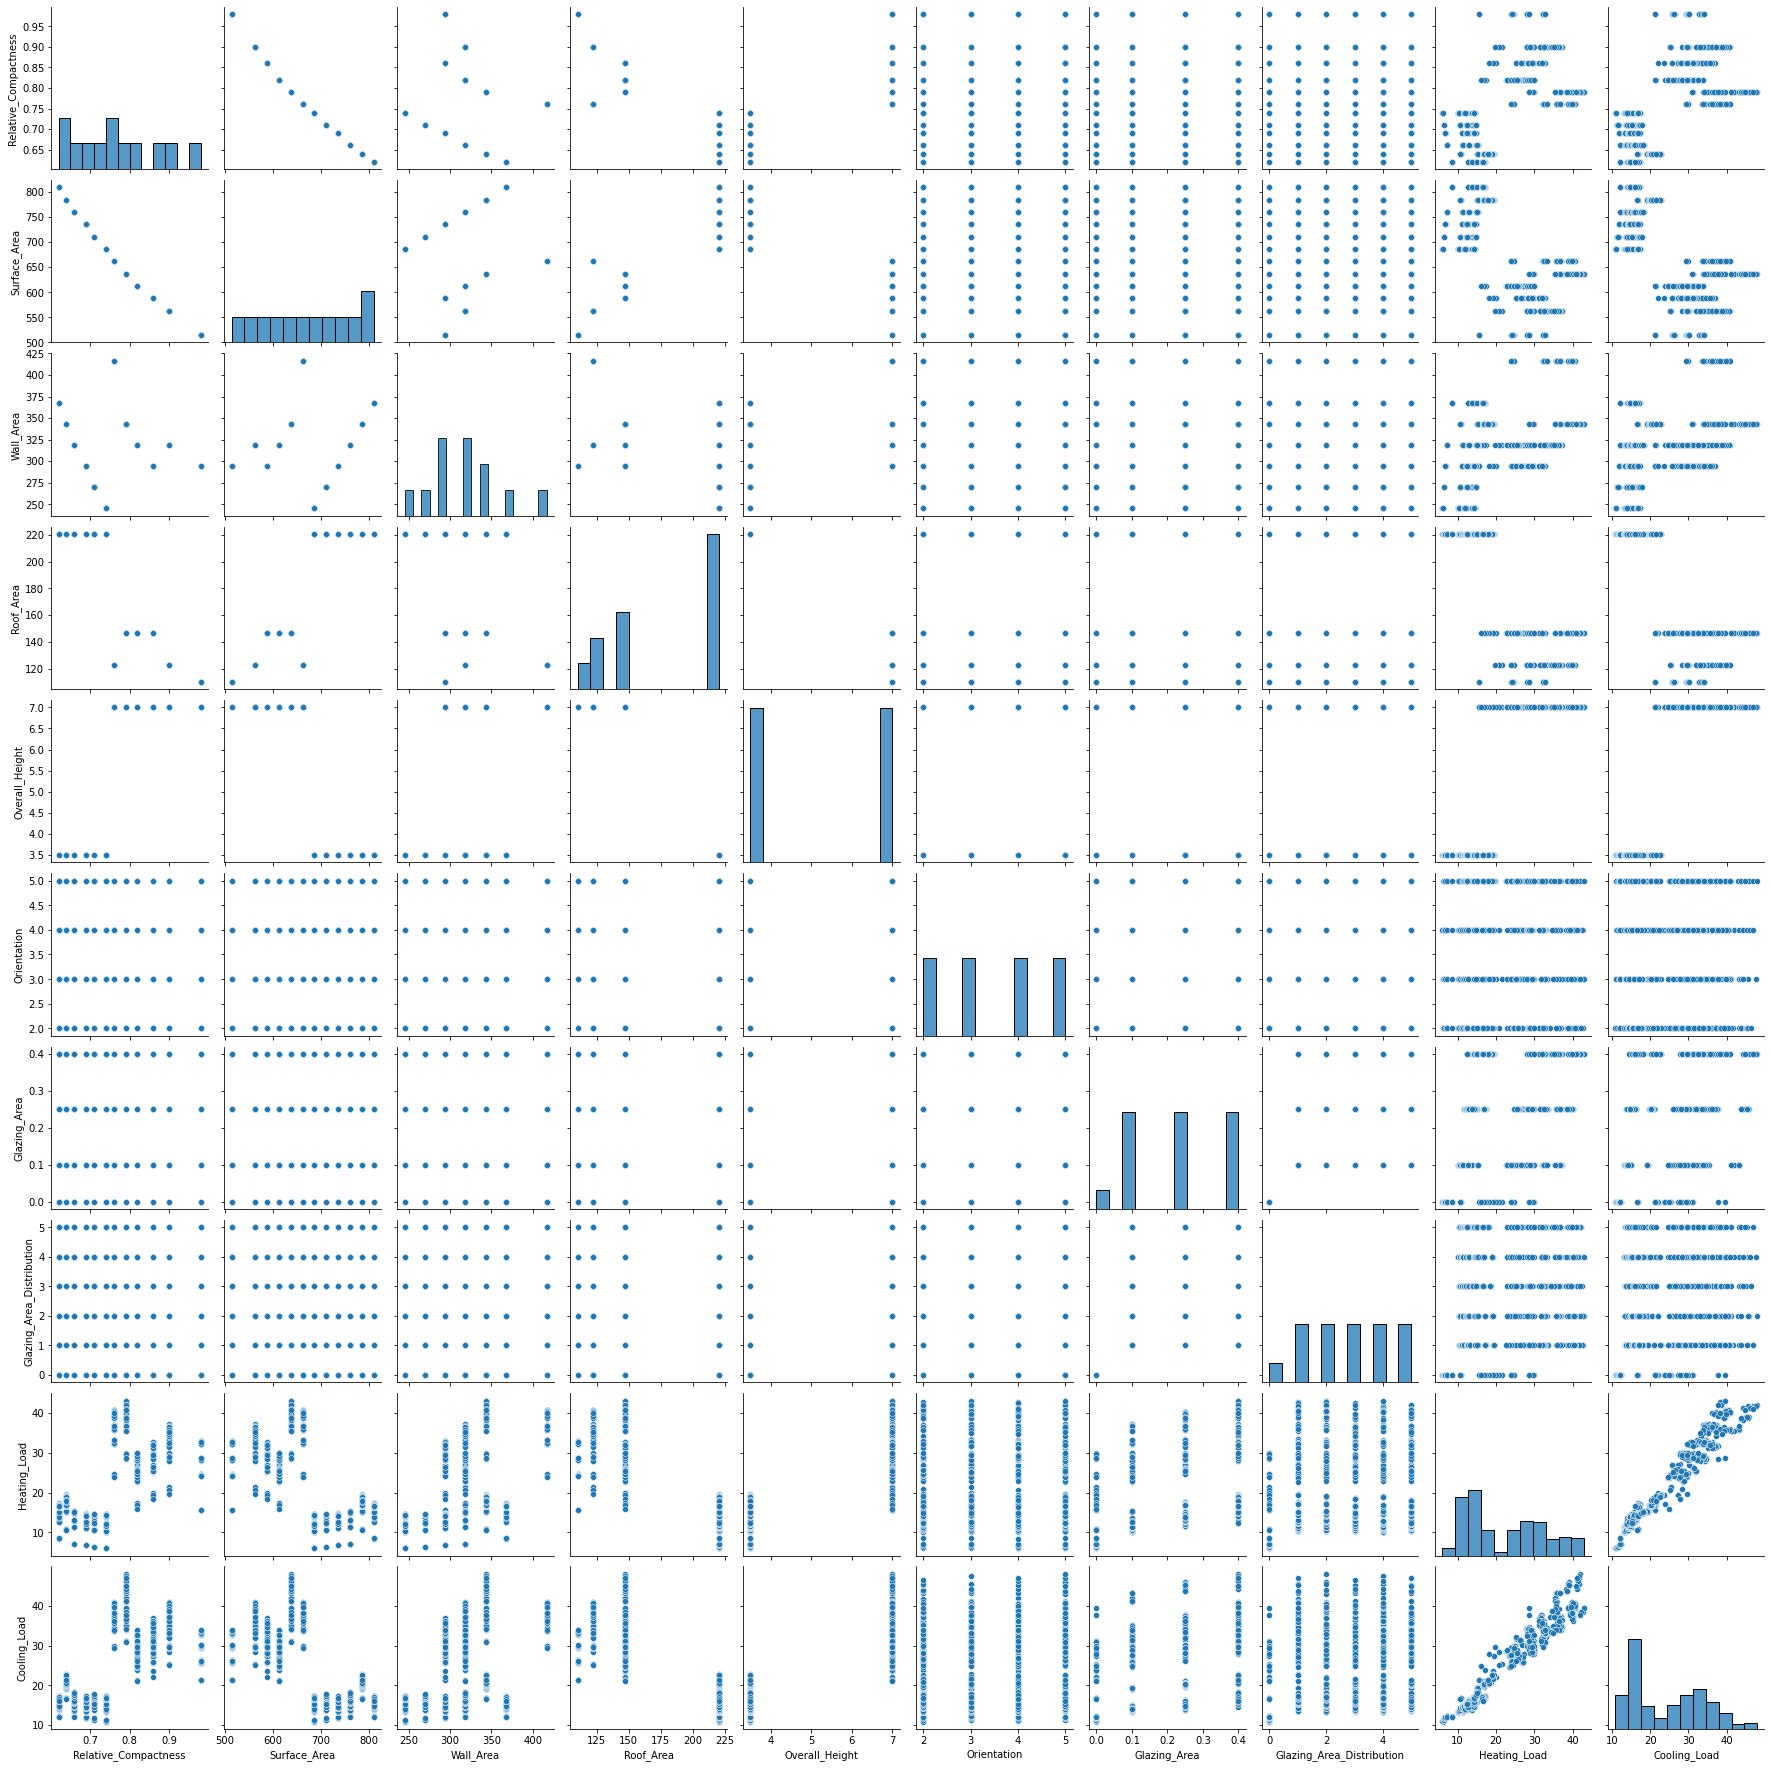

In [23]:
sns.pairplot(data_bef)

##### From this graph it can be easily observed that "Heating Load" and "Cooling Load" are highly correlated.
##### Both "Heating Load" and "Cooling Load" is correlated with Relative Compactness, Surface Area, Roof Area and Overall Height

<AxesSubplot:>

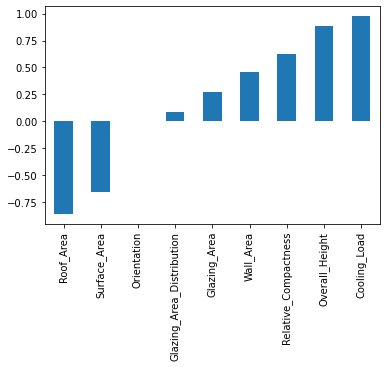

In [24]:
data_bef.corr()['Heating_Load'].sort_values()[:-1].plot.bar()

This correlation plot shows that Heating Load and Cooling Load which are heating load and cooling load are almost perfectly correlated. This was expected.
Roof Area and Overall Height are also highly correlated with Heating Load, so they are also correlated with Cooling Load. These are roof area and overall height. This is also expected beacuse they both increase the volume of the house which makes it harder to heat or cool.
Lastly Relative Compactness, Surface Area and Wall Area are corelated to Heating Load (Cooling Load, too). These are relative compactness, surface area and wall area. These are also expected.
However Orientation and Glazing Area Distribution have almost 0 correlation. These values are orientation and glazing area distribution. This also makes sense because these values are irrelevant.

<AxesSubplot:>

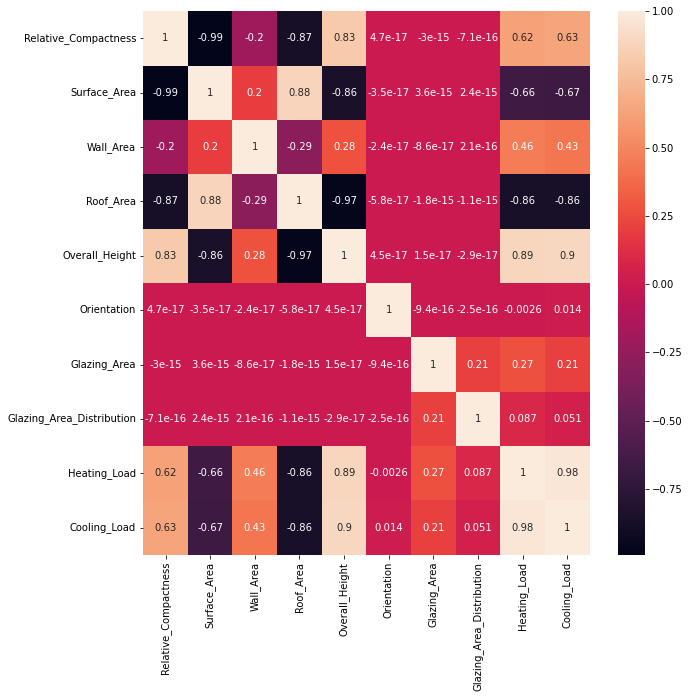

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(data_bef.corr(), annot=True)

This correlation heatmap shows that Relative Compactness is almost perfectly correlated to Surface Area. This means if we feed both to the model we would increase bias because they are repetition of each other. Same goes for Roof Area and Overall Height. So we will drop one of both. However let's keep the original dataframe to compare the results.

In [26]:
new_data_bef = data_bef.drop(['Relative_Compactness','Roof_Area'], axis=1)

In [27]:
X = new_data_bef.drop(['Heating_Load', 'Cooling_Load'], axis=1)
y = new_data_bef[['Heating_Load', 'Cooling_Load']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
print(X_train)

     Surface_Area  Wall_Area  Overall_Height  Orientation  Glazing_Area  \
374         759.5      318.5             3.5          4.0          0.25   
578         514.5      294.0             7.0          4.0          0.40   
214         661.5      416.5             7.0          4.0          0.10   
65          637.0      343.0             7.0          3.0          0.10   
763         784.0      343.0             3.5          5.0          0.40   
..            ...        ...             ...          ...           ...   
210         637.0      343.0             7.0          4.0          0.10   
717         808.5      367.5             3.5          3.0          0.40   
217         686.0      245.0             3.5          3.0          0.10   
251         588.0      294.0             7.0          5.0          0.10   
371         735.0      294.0             3.5          5.0          0.25   

     Glazing_Area_Distribution  
374                        2.0  
578                        2.0  


In [29]:
models = [LinearRegression, ElasticNet, Lasso, DecisionTreeRegressor, RandomForestRegressor]
for model in models:
    reg = model()
    reg.fit(X_train,y_train)
    pred = reg.predict(X_test)
    err = mean_squared_error(y_test, pred) ** .5
    print(f'RMSE of {model.__name__} model is: {err}')
    print(f'R2 value of {model.__name__} is: {np.mean(r2_score(y_test, pred))}')
    print('*'*50)

RMSE of LinearRegression model is: 3.1085358644577776
R2 value of LinearRegression is: 0.9002533293196382
**************************************************
RMSE of ElasticNet model is: 4.475824752650065
R2 value of ElasticNet is: 0.7947616484644683
**************************************************
RMSE of Lasso model is: 4.624893379389307
R2 value of Lasso is: 0.7808618000686266
**************************************************
RMSE of DecisionTreeRegressor model is: 1.6881656455316367
R2 value of DecisionTreeRegressor is: 0.9695699308681506
**************************************************
RMSE of RandomForestRegressor model is: 1.2907897315863763
R2 value of RandomForestRegressor is: 0.9822554203516562
**************************************************


Linear regession is the best model among the three linear models. However tree models resulted much better. Their error is pretty low. Mean values of y1 and y2 are around 20 and standard deviation of them are around 10. The total rmse for y1 and y2 is around 1 which is a good value according to the mean and standard deviation of y1 and y2. Moreover 98% R^2 is also a good value.